# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png width=400>

# Import Statements

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression



# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('data/cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
print(data.shape)
data.sample(n=10)

(5391, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4742,3668,12/8/2014,Swelter,"$8,000,000",$0,$0
4705,4069,10/17/2014,Rudderless,"$5,000,000","$567,219","$56,001"
1806,1225,5/4/2002,Big Trouble,"$45,000,000","$8,488,871","$7,262,288"
55,4468,10/4/1952,Singin' in the Rain,"$2,540,000","$7,200,000","$7,200,000"
4187,3913,7/9/2012,The Inbetweeners,"$5,700,000","$86,051,320","$35,955"
4087,886,1/20/2012,Red Tails,"$58,000,000","$50,365,498","$49,876,377"
4183,2756,6/29/2012,People Like Us,"$16,000,000","$12,519,804","$12,431,792"
739,1195,9/30/1994,The River Wild,"$45,000,000","$94,215,000","$46,815,000"
4460,1021,9/8/2013,Disney Planes,"$50,000,000","$238,059,569","$90,282,580"
3429,4365,7/31/2009,The Collector,"$3,000,000","$10,473,836","$7,712,114"


### Data Type Conversions

In [14]:
# Number of missing values
print(f"Data has this many missing values: {data.isna().values.sum()}")
print(f"Any missing values: {data.isna().values.any()}")

Data has this many missing values: 0
Any missing values: False


In [17]:
print(f"Number of dupliated rows: {data.duplicated().values.sum()}")

Number of dupliated rows: 0


In [20]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   object        
 4   USD_Worldwide_Gross    5391 non-null   object        
 5   USD_Domestic_Gross     5391 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 252.8+ KB


In [25]:

columns_to_num = data.columns[3:6] # 3 columns to make numeric after removing commas
chars_to_remove = ['$', ',']
for col in columns_to_num:
    for char in chars_to_remove:
        data[col] = data[col].astype(str).str.replace(char, "")
        
    data[col] = pd.to_numeric(data[col])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [27]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [35]:
data[['USD_Production_Budget','USD_Worldwide_Gross', 'USD_Domestic_Gross']].agg({'USD_Production_Budget':[pd.Series.mean, pd.Series.min, pd.Series.max], 
                                                                                 'USD_Worldwide_Gross': [pd.Series.mean, pd.Series.min, pd.Series.max], 
                                                                                 'USD_Domestic_Gross': [pd.Series.mean, pd.Series.min, pd.Series.max]})

,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
mean,"31,113,737.58","88,855,421.96","41,235,519.44"
min,"1,100.00",0.00,0.00
max,"425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [39]:
data[data['USD_Domestic_Gross'] <=0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [40]:
data[data['USD_Worldwide_Gross'] <=0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


### Filtering on Multiple Conditions

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [44]:
money_losing = data.query('USD_Production_Budget > USD_Worldwide_Gross') # anotehr way would be  data[ data.USD_Produciton_Budget > data.USE_Worldwide_Gropss ]
print(f"% of movies losing money: {100*money_losing.shape[0]/data.shape[0]} %")
money_losing.head()

(2014, 6)
% of movies losing money: 37.3585605639028 %


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [48]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
data[data['Release_Date'] > scrape_date] # movies not yet released

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


# Seaborn for Data Viz: Bubble Charts

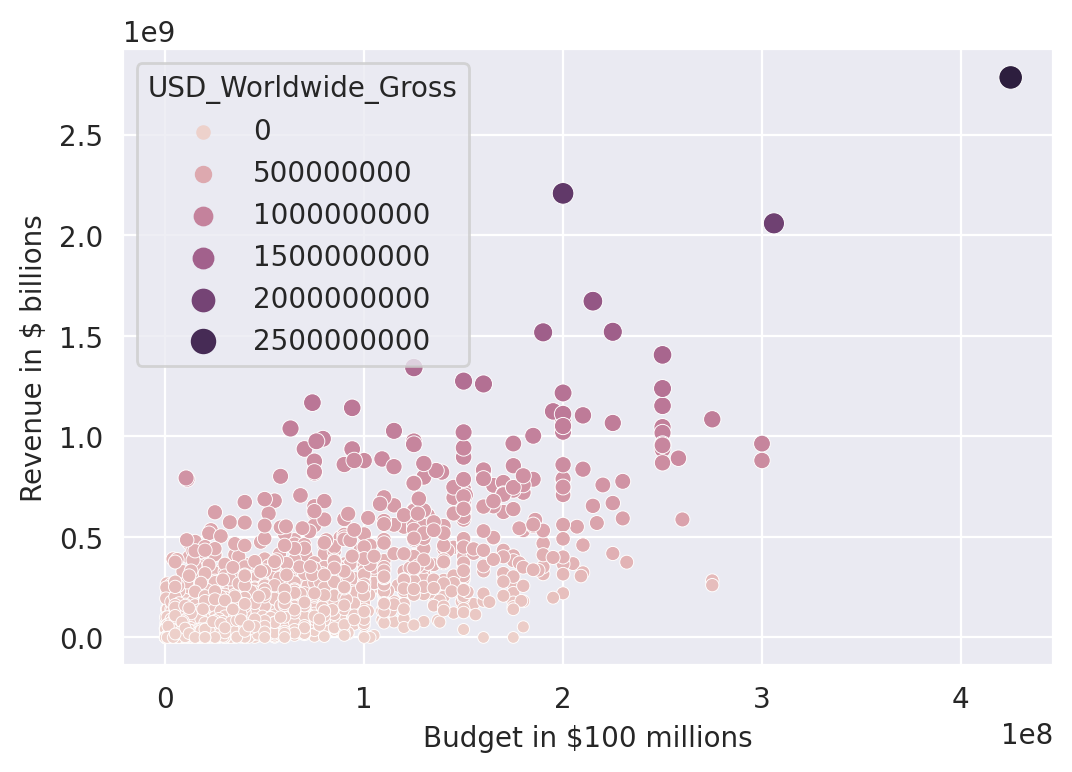

In [63]:
plt.figure(figsize=(6,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data, x='USD_Production_Budget',y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')
    ax.set(xlabel='Budget in $100 millions', ylabel='Revenue in $ billions')
plt.show()

### Plotting Movie Releases over Time





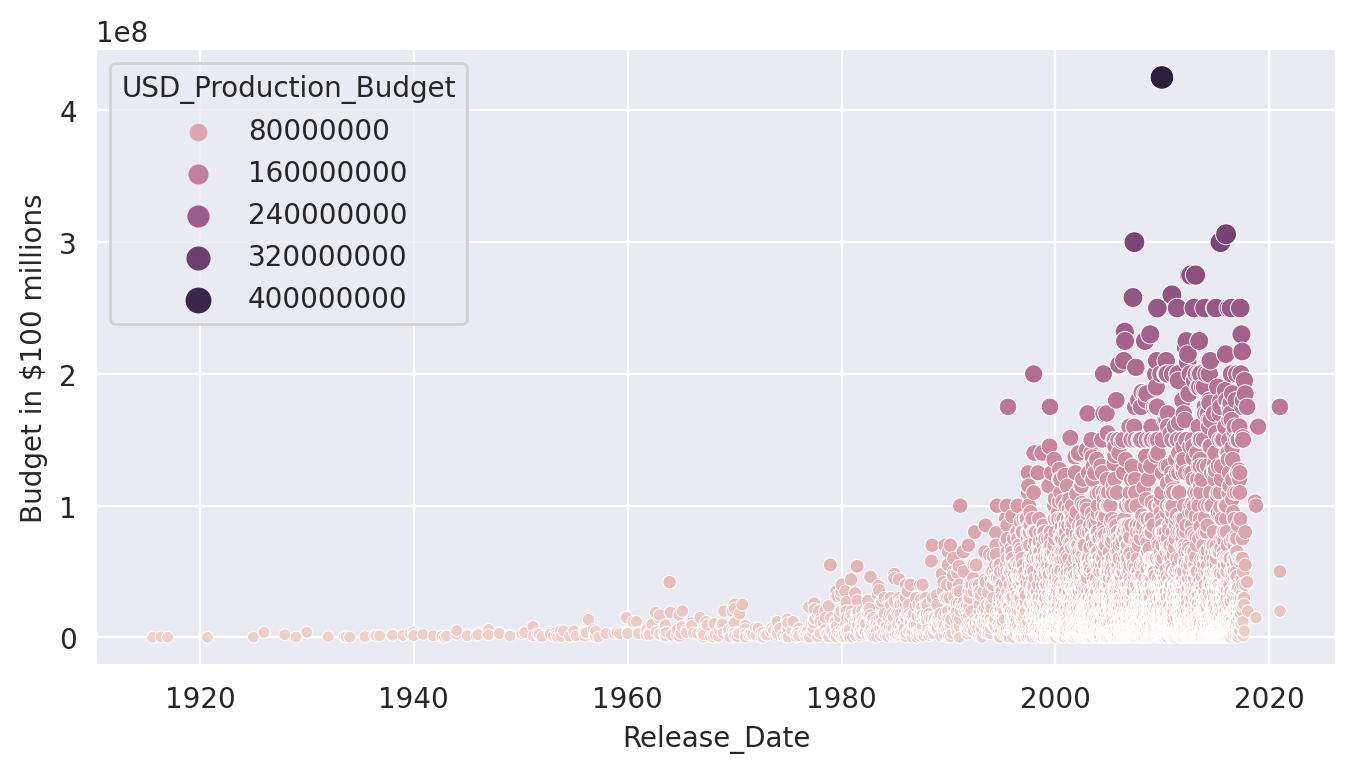

In [64]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data, x='Release_Date',y='USD_Production_Budget',
                     hue='USD_Production_Budget', size='USD_Production_Budget')
    ax.set(ylabel='Budget in $100 millions')
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [69]:
dt_index = pd.DatetimeIndex(data['Release_Date'])
years = dt_index.year
decades = (years // 10)*10
data['Decade'] = decades

data.sample(10)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
1744,3695,2001-12-31,The Hole,7500000,10834406,0,2000
4093,698,2012-02-03,Doctor Seuss' The Lorax,67500000,350976753,214030500,2010
669,3188,1993-03-09,Fortress,12000000,46730578,6730578,1990
1144,3643,1998-09-25,Clay Pigeons,8000000,2256606,1793359,1990
1813,4730,2002-05-17,The Believer,1500000,1840248,406035,2000
1113,5171,1998-07-08,"First Love, Last Rites",300000,10876,10876,1990
4317,4488,2013-01-03,The Lost Medallion: The Adventures of Billy Stone,2500000,549632,549632,2010
666,3806,1993-02-04,The Adventures of Huck Finn,6500000,24103594,24103594,1990
1035,290,1997-12-19,Tomorrow Never Dies,110000000,339504276,125304276,1990
1254,4212,1999-05-28,The Loss of Sexual Innocence,4000000,399793,399793,1990


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [70]:
old_films = data[data.Decade < 1970]
new_films = data[data.Decade >= 1970]
print(f"old films shape: {old_films.shape} -- new films shape: {new_films.shape}")

old films shape: (153, 7) -- new films shape: (5238, 7)


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

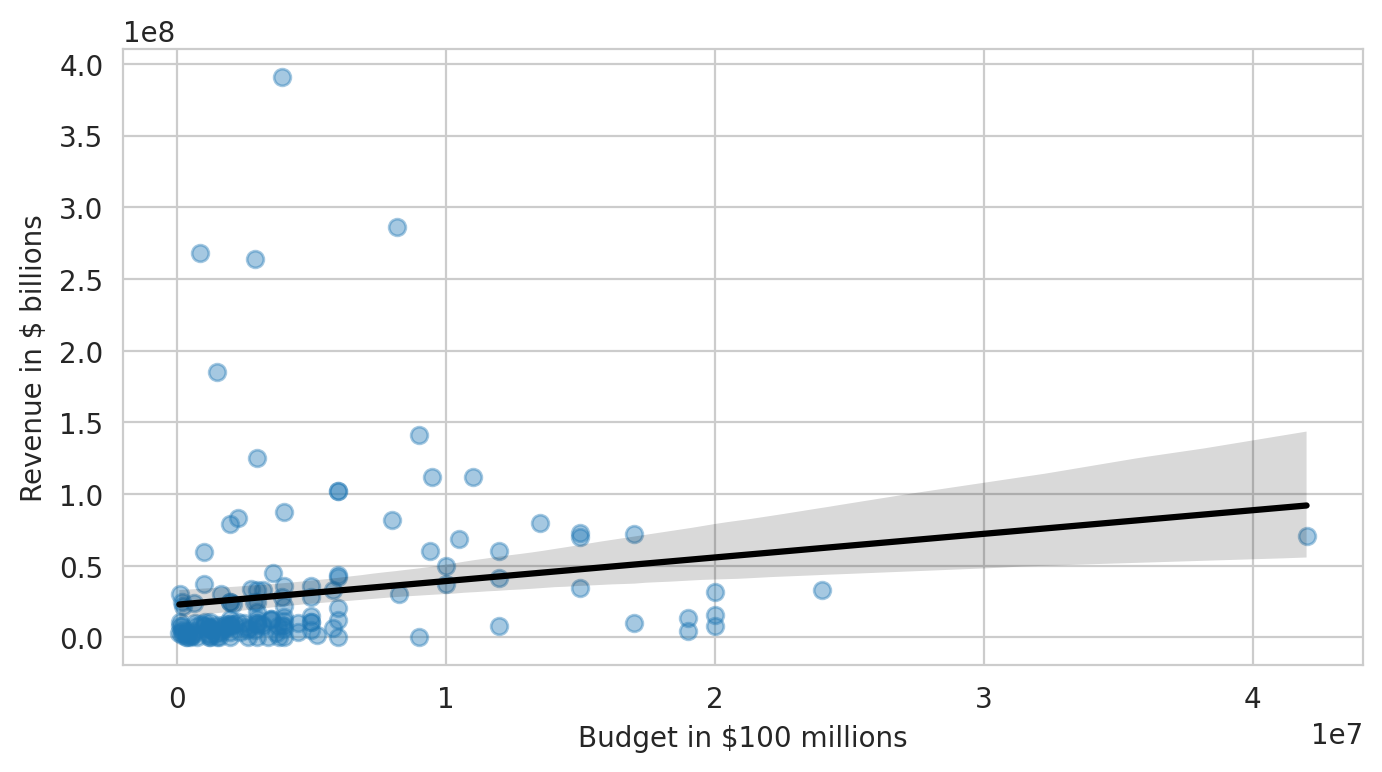

In [79]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
    ax = sns.regplot(data=old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross',
                scatter_kws={'alpha': 0.4},
                line_kws = {'color':'black'})
    ax.set(ylabel='Revenue in $ billions', xlabel='Budget in $100 millions')
    

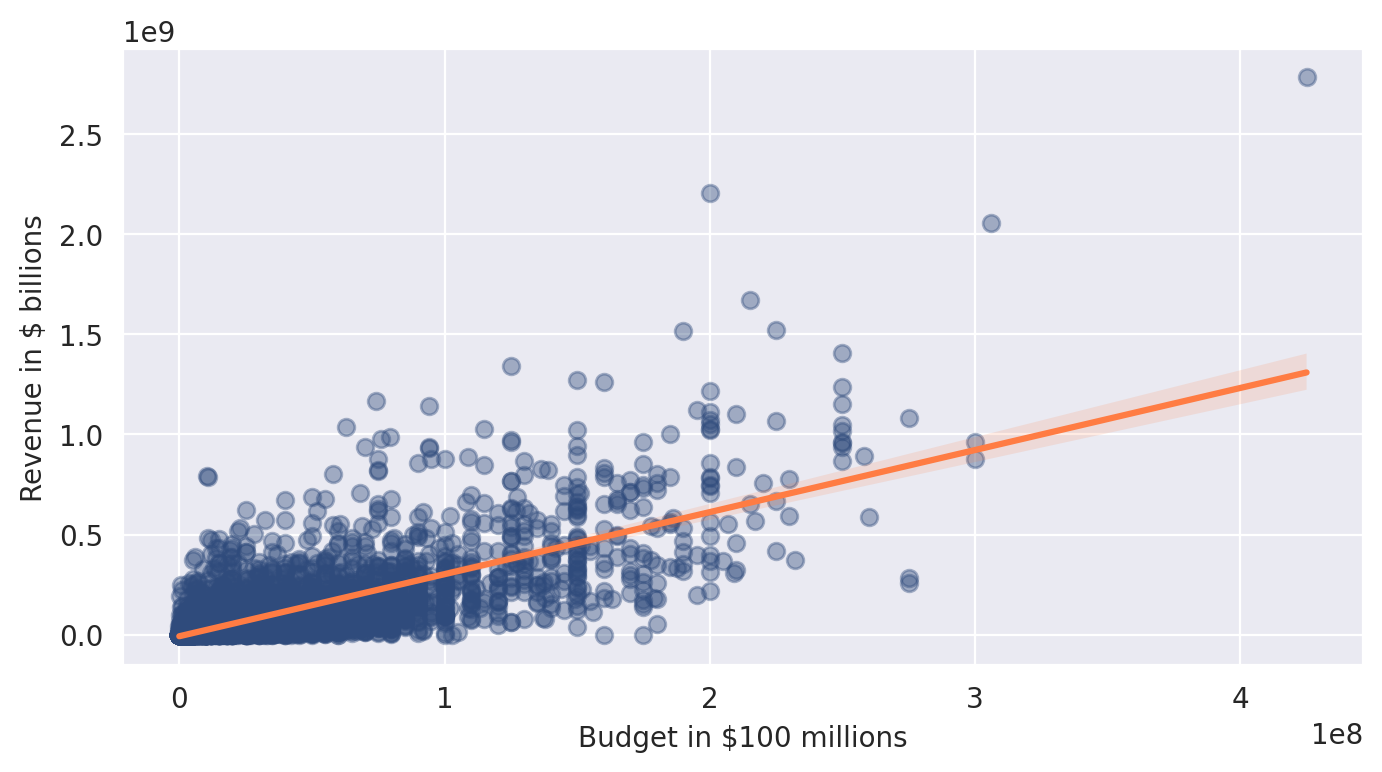

In [78]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax=sns.regplot(data=new_films, x='USD_Production_Budget', y='USD_Worldwide_Gross',
                scatter_kws={'alpha': 0.4},
                color='#2f4b7c',
                line_kws = {'color':'#ff7c43'})
    ax.set(ylabel='Revenue in $ billions', xlabel='Budget in $100 millions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [85]:
regression = LinearRegression()
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

regression.fit(X, y)


0.5529880674636849

In [87]:
print(f"R2: {regression.score(X, y)}")
print(f"Regression equation: Y = {regression.intercept_[0]} + {regression.coef_[0]} X")

R2: 0.5529880674636849
Regression equation: Y = -8338272.436595112 + [3.10151167] X


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [98]:

rev_estimate = regression.intercept_[0] + regression.coef_[0,0]*350000000
print(f"Revenue estimate for $350 mil budget film: {round(rev_estimate,-6)}")

Revenue estimate for $350 mil budget film: 1077000000.0
